In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data():
    
    movies = pd.read_csv('movies.csv')
    ratings = pd.read_csv('ratings.csv')
    
    data = pd.merge(ratings, movies, on='item', how='left')
    
    data = data.drop(['timestamp'], axis=1)
    data = data.drop(['plot'],axis=1)
    
    return data

In [3]:
data = get_data()
data.head()

,user,item,rating,title,year,genres
0,1,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,grumpier old men,1995,Comedy|Romance
2,1,6,4.0,heat,1995,Action|Crime|Thriller
3,1,70,3.0,from dusk till dawn,1996,Action|Comedy|Horror|Thriller
4,1,101,5.0,bottle rocket,1996,Adventure|Comedy|Crime|Romance


In [4]:
def get_sparsity(data):
    return 1 - (len(data['rating']) / (len(data['user'].unique())*len(data['item'].unique())))

In [5]:
sparsity = get_sparsity(data)
sparsity

0.9771597696056712

In [6]:
data_bin = data.groupby('user').filter(lambda x: len(x)<50)
print('number of low rated users')
display(data_bin['user'].nunique())
print('high rating users')
display((data.groupby('user').filter(lambda x: len(x)>50))['user'].nunique())
print('total users')
display(data['user'].nunique())
print('ratio:')
display(data_bin['user'].nunique()/data['user'].nunique())

number of low rated users


313

high rating users


296

total users


610

ratio:


0.5131147540983606

In [7]:
data_bin2 = data.groupby('item').filter(lambda x: len(x)<10)
print('number of low rated movies')
display(data_bin2['item'].nunique())
print('number of highly rated movies')
display((data.groupby('item').filter(lambda x: len(x)>10))['item'].nunique())
print('total number of movies')
display(data['item'].nunique())
print('ratio:')
display(data_bin2['item'].nunique()/data['item'].nunique())

number of low rated movies


3124

number of highly rated movies


1421

total number of movies


4625

ratio:


0.6754594594594595

In [8]:
def filter_data(data):
    data = data.groupby('user').filter(lambda x: len(x)>50)
    data = data.groupby('item').filter(lambda x: len(x)>10)
    return data

In [9]:
data = filter_data(data)
display(get_sparsity(data))

0.8863128268593556

In [10]:
data.isna().sum()

user      0
item      0
rating    0
title     0
year      0
genres    0
dtype: int64

In [11]:
data['title'].value_counts()

forrest gump                    220
pulp fiction                    199
jurassic park                   166
fight club                      157
toy story                       154
                               ... 
flirting with disaster           11
beethoven                        11
atonement                        11
guess who's coming to dinner     11
dunkirk                          11
Name: title, Length: 1354, dtype: int64

In [12]:
data['user'].value_counts()

414    1040
599     879
68      743
448     694
474     669
       ... 
503      41
342      40
108      38
184      34
571      28
Name: user, Length: 296, dtype: int64

In [13]:
data['rating'].value_counts()

4.0    12416
3.0     9175
3.5     6255
5.0     5598
4.5     3885
2.0     3259
2.5     2558
1.0     1181
1.5      716
0.5      521
Name: rating, dtype: int64

In [14]:
data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
paths of glory                      4.545455
guess who's coming to dinner        4.545455
patton                              4.444444
ran                                 4.433333
his girl friday                     4.392857
                                      ...   
beethoven                           1.772727
superman iv: the quest for peace    1.687500
battlefield earth                   1.676471
speed 2: cruise control             1.638889
problem child                       1.583333
Name: rating, Length: 1354, dtype: float64

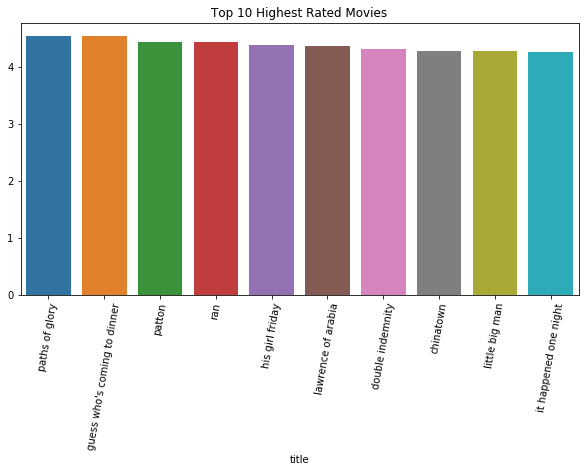

In [15]:
plt.figure(figsize=(10,5))
topmovies = data.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Highest Rated Movies')
plt.xticks(rotation=80);

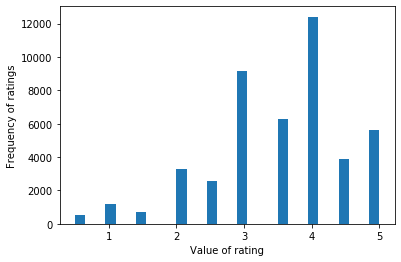

In [16]:
plt.hist(data['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.show()

In [17]:
def remove_low_rates(data):
    data = data.loc[data['rating']>=2.5]
    return data

In [18]:
data = remove_low_rates(data)

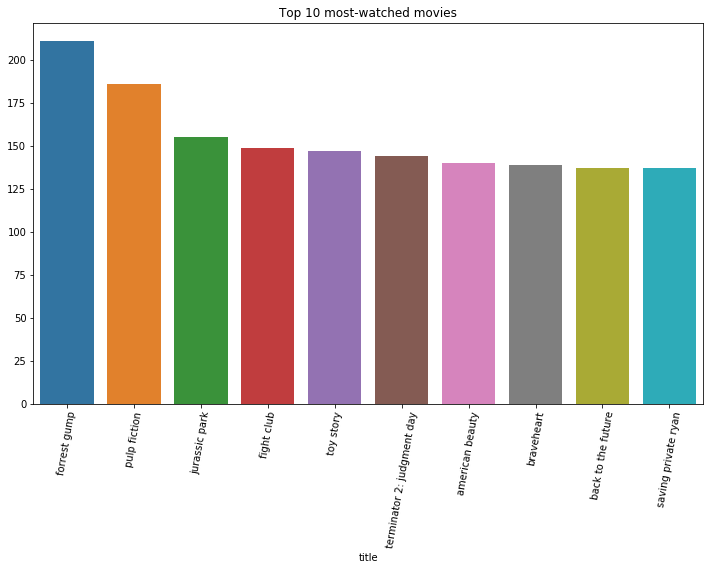

In [19]:
plt.figure(figsize=(12,7))
topmovies = data.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [20]:
def get_genre_labels(data):
    genrelabels = set()
    for i in data['genres'].str.split('|').values:
        genrelabels = genrelabels.union(set(i))
    
    return genrelabels

In [21]:
genrelabels = get_genre_labels(data)
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [22]:
def genrecounts(df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    genres = pd.DataFrame(list(count.items()),columns = ['Genre','Frequency'])
    return genres

In [23]:
genre_count = genrecounts(data, 'genres', genrelabels)
genres = genre_count.sort_values(by='Frequency', ascending=False)
genres

,Genre,Frequency
2,Comedy,16777
10,Drama,16530
6,Action,12575
9,Thriller,10587
8,Adventure,10499
17,Romance,8230
3,Sci-Fi,7492
5,Crime,7059
16,Fantasy,5047
14,Children,3781


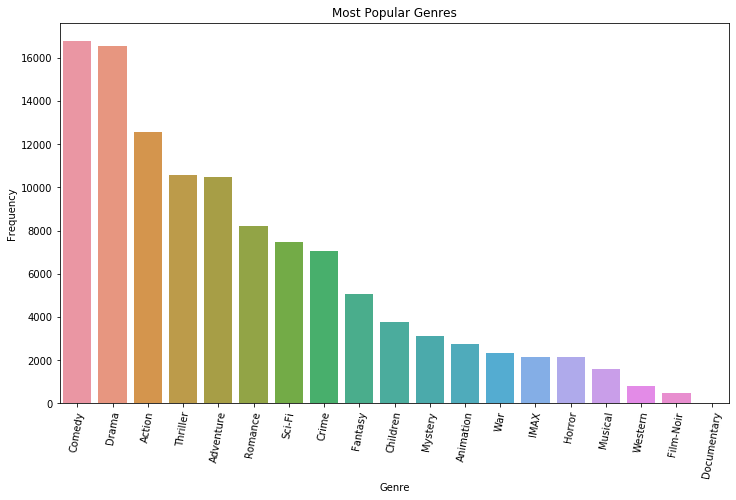

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(genres['Genre'], genres['Frequency'])
plt.title('Most Popular Genres')
plt.xticks(rotation=80);

## Model

In [25]:
data_2 = data[['user','title','rating']]

In [26]:
user_rating = data_2.pivot(index='user',columns='title',values='rating').fillna(0)
user_rating.head()

title,(500) days of summer,10 cloverfield lane,10 things i hate about you,"10,000 bc",101 dalmatians,12 angry men,12 years a slave,127 hours,13 going on 30,1408,...,young guns,young guns ii,young sherlock holmes,zack and miri make a porno,zero dark thirty,zero effect,zodiac,zombieland,zoolander,zootopia
user,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_rating_vectors = csr_matrix(user_rating.values)
user_rating_vectors.todense()

matrix([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 3. , 0. ],
        [3.5, 4. , 0. , ..., 3.5, 4. , 4. ]])

In [28]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_rating_vectors)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [29]:
def get_similar_users(user, n = 5):

    knn_input = np.asarray(user_rating.loc[user_rating.index==user])
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
  
    print(n,"similar users to the user ",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "with distance measure of: ",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [30]:
def get_random_user():
    total_users = data_2.groupby(['user']).count()
    total_users = total_users.index
    selected_user = np.random.choice(total_users)
    
    return selected_user

In [31]:
def get_mean_distance(user, n):
    
    knn_input = np.asarray(user_rating.loc[user_rating.index==user])
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
    mean_distance = np.mean(distances)
    
    return mean_distance

In [32]:
from pprint import pprint
user_id = get_random_user()
print("random user: " + str(user_id))
print("movies seen by "+str(user_id) + ":")
pprint(list(data_2[data_2['user'] == user_id]['title'])[:10])
similar_users, distances = get_similar_users(user_id,5)

random user: 265
movies seen by 265:
['dead man walking',
 'braveheart',
 'taxi driver',
 'apollo 13',
 'dolores claiborne',
 'legends of the fall',
 "nobody's fool",
 'outbreak',
 'stargate',
 'it could happen to you']
5 similar users to the user  265 are: 
 
1 . User: 96 with distance measure of:  0.6481168301695288
2 . User: 226 with distance measure of:  0.6542901690466413
3 . User: 88 with distance measure of:  0.6774063271447707
4 . User: 276 with distance measure of:  0.6926813627346302
5 . User: 280 with distance measure of:  0.698155273800359


In [33]:
sim_close, user_close_distance = get_similar_users(user_id,5)
sim_total, user_total_distance= get_similar_users(user_id,len(user_rating.index)-1)
display(np.mean(user_close_distance))
display(np.mean(user_total_distance))
display((np.mean(user_close_distance)/np.mean(user_total_distance)))

5 similar users to the user  265 are: 
 
1 . User: 96 with distance measure of:  0.6481168301695288
2 . User: 226 with distance measure of:  0.6542901690466413
3 . User: 88 with distance measure of:  0.6774063271447707
4 . User: 276 with distance measure of:  0.6926813627346302
5 . User: 280 with distance measure of:  0.698155273800359
295 similar users to the user  265 are: 
 
1 . User: 96 with distance measure of:  0.6481168301695288
2 . User: 226 with distance measure of:  0.6542901690466413
3 . User: 88 with distance measure of:  0.6774063271447707
4 . User: 276 with distance measure of:  0.6926813627346302
5 . User: 280 with distance measure of:  0.698155273800359
6 . User: 48 with distance measure of:  0.6993585667648872
7 . User: 274 with distance measure of:  0.6999782707597342
8 . User: 136 with distance measure of:  0.7033618521690203
9 . User: 149 with distance measure of:  0.7049357864376955
10 . User: 32 with distance measure of:  0.7064880569588947
11 . User: 261 with dis

0.674129992579186

0.8661261148064746

0.7783277528005401

In [34]:
similar_users, distances

(array([ 96, 226,  88, 276, 280]),
 array([0.64811683, 0.65429017, 0.67740633, 0.69268136, 0.69815527]))

In [35]:
normalised_distances = distances/np.sum(distances)
normalised_distances

array([0.19228245, 0.19411395, 0.20097202, 0.2055038 , 0.20712779])

In [36]:
similar_users_ratings = user_rating.values[similar_users]
similar_users_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
movies_list = user_rating.columns
movies_list

Index(['(500) days of summer', '10 cloverfield lane',
       '10 things i hate about you', '10,000 bc', '101 dalmatians',
       '12 angry men', '12 years a slave', '127 hours', '13 going on 30',
       '1408',
       ...
       'young guns', 'young guns ii', 'young sherlock holmes',
       'zack and miri make a porno', 'zero dark thirty', 'zero effect',
       'zodiac', 'zombieland', 'zoolander', 'zootopia'],
      dtype='object', name='title', length=1354)

In [38]:
weights = normalised_distances[:,np.newaxis] + np.zeros(len(movies_list))
weights.shape

(5, 1354)

In [39]:
new_rating_matrix = weights*similar_users_ratings
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
from pprint import pprint
def recommend_movies(n,mean_ratings):
    n = min(len(mean_ratings),n)
    pprint(list(movies_list[np.argsort(mean_ratings)[::-1][:n]]))
    
print("Movies recommended based on similar users are: ")
print("NOTE: movies here might be repeated from the user's watch list")
recommend_movies(10, mean_rating_list)

Movies recommended based on similar users are: 
NOTE: movies here might be repeated from the user's watch list
['terminator 2: judgment day',
 'braveheart',
 'forrest gump',
 'jurassic park',
 'true lies',
 'pulp fiction',
 'sleepless in seattle',
 'mrs. doubtfire',
 'ghost',
 'batman forever']


In [41]:
def filtered_movie_recommendations(n,mean_ratings):
  
    first_zero_index = np.where(mean_ratings == 0)[0][-1]
    sortd_index = np.argsort(mean_ratings)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(data_2[data_2['user'] == user_id]['title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
        if i not in movies_watched:
            count+=1
            final_movie_list.append(i)
        if count == n:
            break
    if count == 0:
        print("user has watched everything that the similar users watched")
    else:
        pprint(final_movie_list)

In [42]:
filtered_movie_recommendations(10,mean_rating_list)

['forrest gump',
 'true lies',
 'pulp fiction',
 'sleepless in seattle',
 'mrs. doubtfire',
 'ghost',
 'batman forever',
 'beauty and the beast',
 'while you were sleeping',
 'clear and present danger']
